In [24]:
#IMPORTING THE NEEDED PYTHON LIBRARIES
import os
import pandas as pd
import numpy as np
import matplotlib.pylab as plt
import seaborn as sns

print(os.getcwd())

C:\Users\junos


In [29]:
#IMPORT FILE INTO PYTHON
df=pd.read_excel("Cleaned_MediCare_Data.xlsx")

In [30]:
#SET VISUAL STYLE
sns.set(style = "whitegrid")
plt.rcParams["figure.figsize"]=(10,6)

In [66]:
#CHECK THE DATASET FIRST 6 ROWS
df.head(6)

,patient_id,doctor_name,department,patient_gender,patient_age,insurance_type,treatment_type,patient_satisfaction_score,average_treatment_cost,readmission_rate_(%),average_wait_time_(mins),staff_rating,revenue_generated,avg_wait_time_hhmm,profit,profit_margin_(%),data_mismatch
0,P-0001,Dr. Daniel Morris,Emergency,Male,3,Medicaid,Emergency Care,88,1960,18.62,46,4,36440,00:46,34480,94.62,Fine
1,P-0002,Dr. Daniel Morris,Radiology,Female,52,Medicare,Routine Checkup,78,2233,8.63,150,1,30546,02:30,28313,92.69,Fine
2,P-0003,Dr. Benjamin Scott,Radiology,Female,79,Private,Emergency Care,64,2105,15.50,145,2,41047,02:25,38942,94.87,Fine
3,P-0004,Dr. James Anderson,Pediatrics,Male,18,Medicaid,Emergency Care,92,6122,19.18,142,4,42430,02:22,36308,85.57,Fine
4,P-0005,Dr. James Anderson,Orthopedics,Other,62,Private,Diagnostics,57,7267,7.14,137,1,2987,02:17,-4280,-143.29,Fine
5,P-0006,Dr. Lisa Carter,General Surgery,Other,60,Medicare,Maternity,70,7486,16.35,136,4,26105,02:16,18619,71.32,Fine


In [32]:
#CHECK THE DATASET FLAST 6 ROWS
df.tail(3)

,patient_id,doctor_name,department,patient_gender,patient_age,insurance_type,treatment_type,patient_satisfaction_score,average_treatment_cost,readmission_rate_(%),average_wait_time_(mins),staff_rating,revenue_generated,avg_wait_time_hhmm,profit,profit_margin_(%),data_mismatch
997,P-0998,Dr. Abigail Foster,Neurology,Female,35,Private,Surgery,94,4945,19.76,169,1,20037,02:49,15092,75.32,Fine
998,P-0999,Dr. Michael Johnson,Pediatrics,Other,3,Uninsured,Diagnostics,55,4030,21.68,35,2,28052,00:35,24022,85.63,Fine
999,P-1000,Dr. James Anderson,General Surgery,Other,48,Uninsured,Emergency Care,86,1786,19.81,133,1,4340,02:13,2554,58.85,Fine


In [33]:
#TOTAL REVENUE PER DEPARTMENT
revenue_by_dept=df.groupby('department')['revenue_generated'].sum().sort_values(ascending=False)

In [37]:
#PREVIEW THE REVENUE BY DEPARTMENT
print(revenue_by_dept.head(8))

department
Emergency          3566297
Oncology           3494334
Neurology          3232409
Orthopedics        3212250
Pediatrics         3152489
General Surgery    3112176
Radiology          3082814
Cardiology         2982972
Name: revenue_generated, dtype: int64


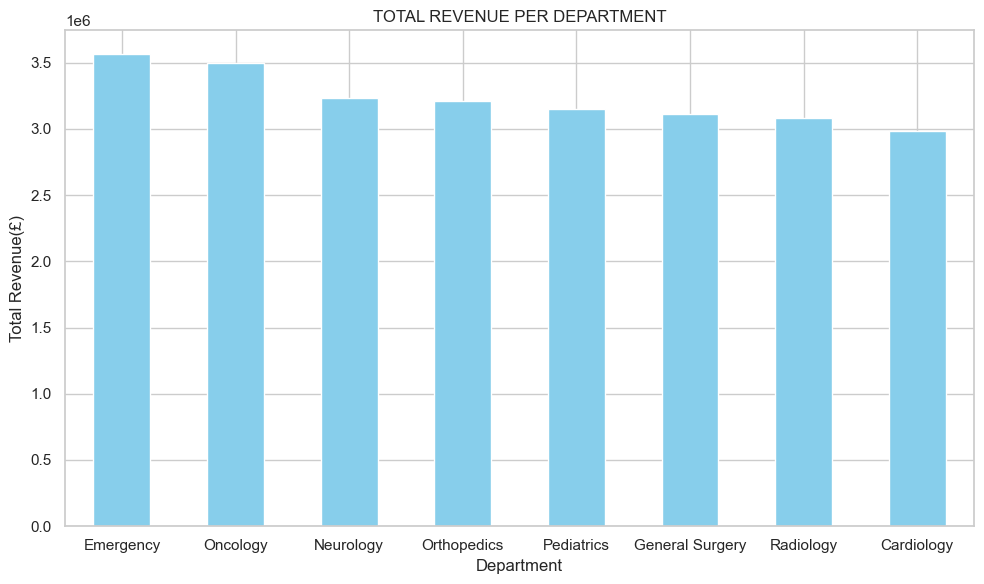

In [45]:
#VISUALIZE THE REVENUE BY DEPARTMENT USING BAR CHART
revenue_by_dept.plot(kind='bar',color ='skyblue')
plt.title("TOTAL REVENUE PER DEPARTMENT")
plt.xlabel("Department")
plt.ylabel("Total Revenue(£)")
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

This Visualization shows the revenue generated by each Department at MediCare

In [87]:
#TOTAL PATIENTS BY INSURANCE TYPE
patients_by_insurance=df['insurance_type'].value_counts()

In [88]:
#PREVIEW THE INSURANCE TYPE
print(patients_by_insurance.head())

insurance_type
Uninsured    256
Private      255
Medicare     247
Medicaid     242
Name: count, dtype: int64


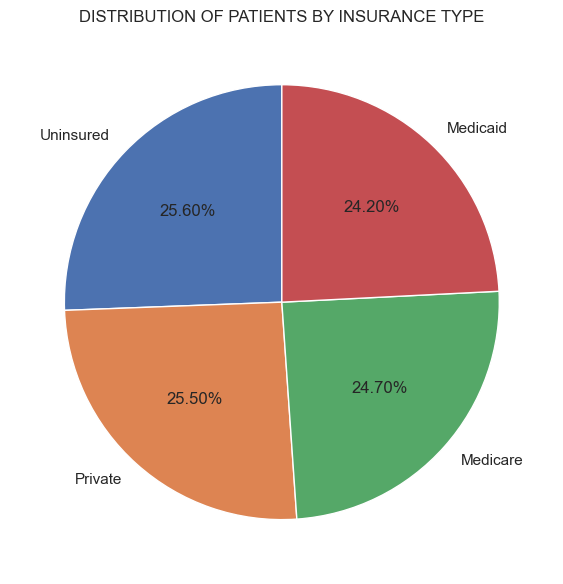

In [89]:
#VISUALIZE THE INSURANCE TYPE USING PIE CHART
patients_by_insurance.plot(kind='pie',autopct='%1.2f%%', startangle=90)
plt.title("DISTRIBUTION OF PATIENTS BY INSURANCE TYPE")
plt.ylabel("")
plt.tight_layout()
plt.show()

In the Pie Chart above, we can see the percentage of patients and the Insurance type they belong to with majority of the patients Unisaured at 25.60%

In [68]:
#DATA MISMATCH REPORT
mismatch_report=df['data_mismatch'].value_counts()
#PREVIEW THE DATA MISMATCH
print(mismatch_report.head())

data_mismatch
Fine                         955
Gender-Treatment Mismatch     45
Name: count, dtype: int64


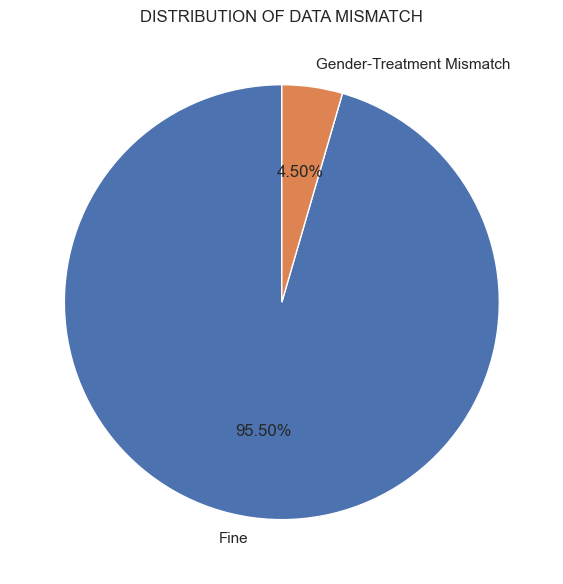

In [71]:
#VISUALIZE OF DATA MISMATCH USING PIE CHART
mismatch_report.plot(kind='pie',autopct='%1.2f%%', startangle=90)
plt.title("DISTRIBUTION OF DATA MISMATCH")
plt.ylabel("")
plt.tight_layout()
plt.show()

MediCare recorded 4.50% data mismatch

In [74]:
#READMISSION RATE BY TREATMENT TYPE
readmission_by_treatment=df.groupby('treatment_type')['readmission_rate_(%)'].mean().round(2).sort_values(ascending=False)
#PREVIEW THE DATA MISMATCH
print(readmission_by_treatment.head())

treatment_type
Emergency Care     15.37
Therapy            15.18
Maternity          15.07
Routine Checkup    15.06
Surgery            14.78
Name: readmission_rate_(%), dtype: float64


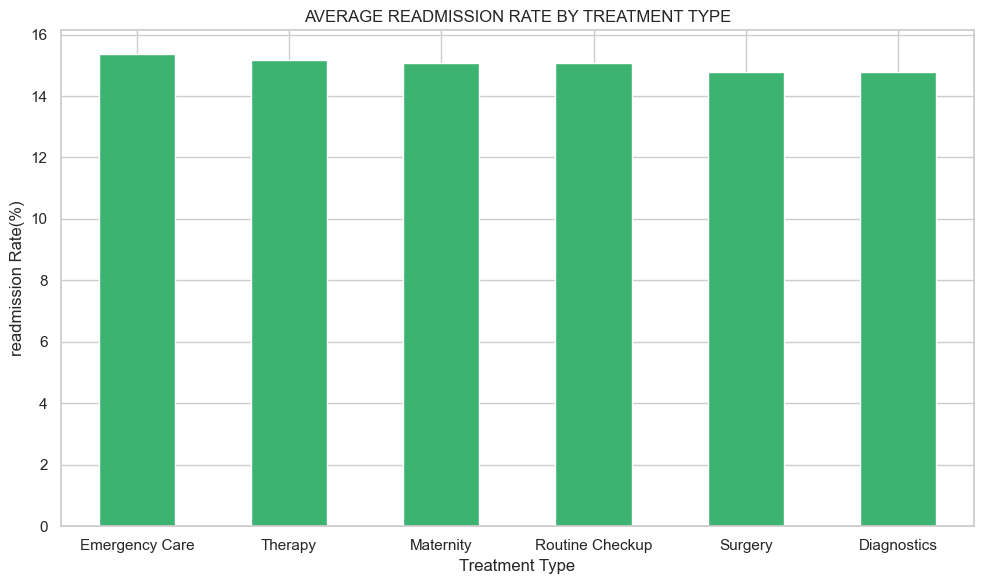

In [101]:
#VISUALIZE THE READMISSION RATE BY TREATMENT TYPE
readmission_by_treatment.plot(kind='bar',color ='mediumseagreen')
plt.title("AVERAGE READMISSION RATE BY TREATMENT TYPE")
plt.xlabel("Treatment Type")
plt.ylabel("readmission Rate(%)")
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

This shows the readmission rate based on treatment type

In [79]:
#PROFIT MARGIN BY DOCTORS
profit_margin_by_doctor=df.groupby('doctor_name')['profit_margin_(%)'].mean().round(2).sort_values(ascending=False)
#PREVIEW THE DATA MISMATCH
print(profit_margin_by_doctor.head(15))

doctor_name
Dr. Robert Mitchell    73.51
Dr. Ethan Wright       70.20
Dr. Daniel Morris      69.57
Dr. Michael Johnson    67.80
Dr. Nathan Turner      66.44
Dr. Benjamin Scott     63.85
Dr. William Harris     61.98
Dr. James Anderson     59.58
Dr. Lisa Carter        59.29
Dr. Abigail Foster     58.43
Dr. Sophia Bennett     57.06
Dr. Emma Roberts       54.52
Dr. Olivia Clark       52.02
Dr. Henry Adams        49.03
Dr. Emily Cooper       47.87
Name: profit_margin_(%), dtype: float64


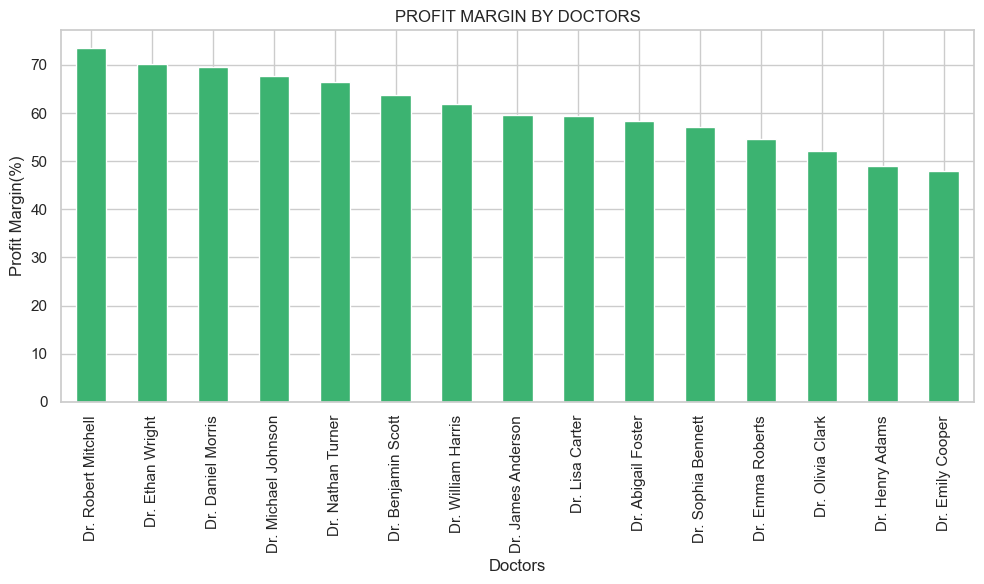

In [100]:
#VISUALIZE THE PROFIT MARGIN BY DOCTORS
profit_margin_by_doctor.plot(kind='bar',color ='mediumseagreen')
plt.title("PROFIT MARGIN BY DOCTORS")
plt.xlabel("Doctors")
plt.ylabel("Profit Margin(%)")
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

The above visualization shows the profit margin for each Doctor working at MedCare

In [105]:
#AVERAGE WAITING TIME PER DEPARTMENT
avg_wait_by_dept = df.groupby('department')['average_wait_time_(mins)'].mean().round(2).sort_values(ascending=False)
#PREVIEW THE WAITING TIME PER DEPARTMENT
print(avg_wait_by_dept.head(8))


department
Emergency          100.41
Pediatrics          98.59
Neurology           97.91
Oncology            97.23
General Surgery     96.59
Orthopedics         94.04
Cardiology          93.45
Radiology           89.72
Name: average_wait_time_(mins), dtype: float64


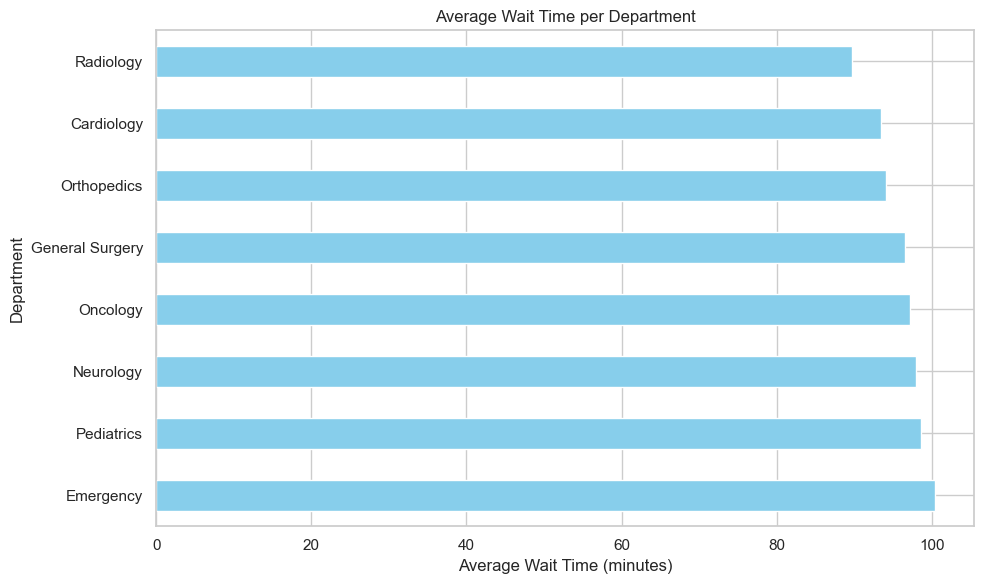

In [104]:
#VISUALIZE OF AVERAGE WAITING TIME PER DEPARTMENT
avg_wait_by_dept.plot(kind='barh', color='skyblue')
plt.title("Average Wait Time per Department")
plt.xlabel("Average Wait Time (minutes)")
plt.ylabel("Department")
plt.tight_layout()
plt.show()


With this we can clearly see the average waiting time for each department in minutes, with emergency department having the longest waiting time 

In [107]:
#AVERAGE WAITING TIME PER DOCTORS
avg_wait_by_doctor = df.groupby('doctor_name')['average_wait_time_(mins)'].mean().round(2).sort_values(ascending=False)
#PREVIEW THE WAITING TIME PER DOCTOR
print(avg_wait_by_doctor.head(8))


doctor_name
Dr. Michael Johnson    104.34
Dr. William Harris     102.94
Dr. Daniel Morris      101.57
Dr. Benjamin Scott     101.18
Dr. Robert Mitchell     99.48
Dr. Nathan Turner       98.35
Dr. James Anderson      97.34
Dr. Olivia Clark        97.16
Name: average_wait_time_(mins), dtype: float64


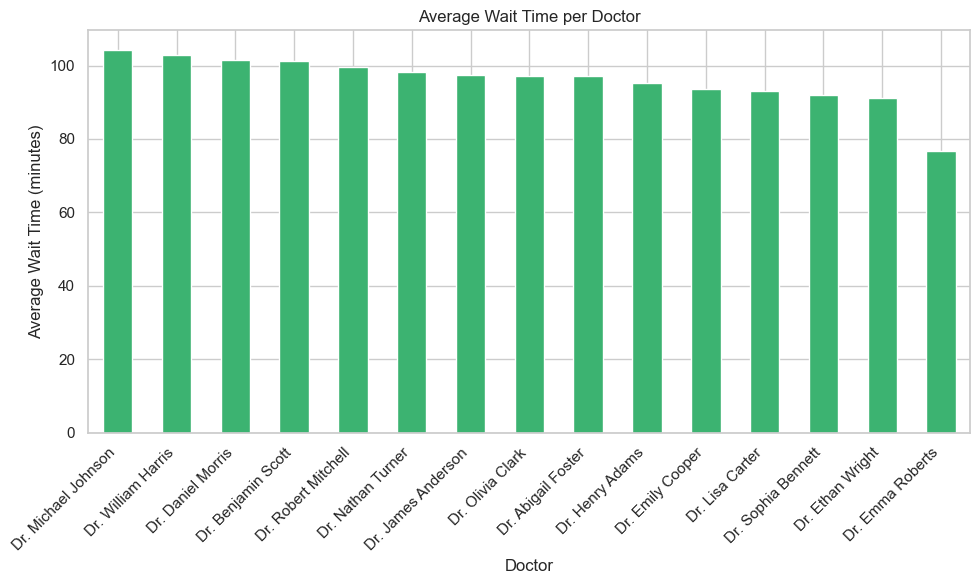

In [99]:
#VISUALIZATION OF AVERAGE WAITING TIME PER DOCTOR
avg_wait_by_doctor.plot(kind='bar', color='mediumseagreen')
plt.title("Average Wait Time per Doctor")
plt.xlabel("Doctor")
plt.ylabel("Average Wait Time (minutes)")
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


This clearly shows how long it takes each doctor before they attend to a patient at MediCare